# Task-3: To Explore unsupervised machine learning.
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually


###### NANDINI JAIN (INTERN AT THE SPARKS FOUNDATION.)

In [61]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris



In [62]:
#Loading the data
iris=load_iris()
df=pd.DataFrame(iris.data, columns = iris.feature_names)
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [63]:
data= df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]


In [64]:
# Finding the optimum number of clusters for k-means classification using elbow method

sse = {}  #sse:sum of squared errors
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    data["clusters"] = kmeans.labels_
    print(data["clusters"])
    sse[k] = kmeans.inertia_    # Inertia:Sum of distances of samples to their closest cluster center

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: clusters, Length: 150, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: clusters, Length: 150, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: clusters, Length: 150, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    2
147    3
148    3
149    2
Name: clusters, Length: 150, dtype: int32
0      2
1      2
2      2
3      2
4      2
      ..
145    4
146    3
147    4
148    4
149    3
Name: clusters, Length: 150, dtype: int32
0      1
1      5
2      5
3      5
4      1
      ..
145    4
146    0
147    4
148    4
149    0
Name: clusters, Length: 150, dtype: int32
0      0
1      3
2      3
3      3
4      0
      ..
145    2
146    1
147    2
148    2
149    1
Name: clusters, Length: 150, dtype: int32
0      1
1   

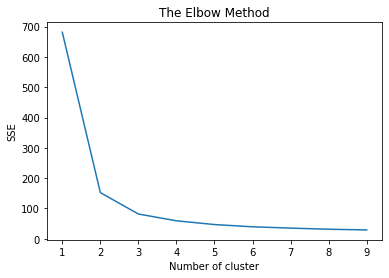

In [65]:
#plotting the figure to find the elbow
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title('The Elbow Method')
plt.show()

In [66]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


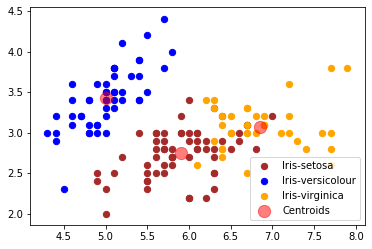

In [71]:
# Visualising the clusters
x = df.iloc[:, [0, 1, 2, 3]].values
centers = kmeans.cluster_centers_

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 40, c = 'brown', label = 'Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=40,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 40, c = 'orange', label = 'Iris-virginica')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.5,label='Centroids')
plt.legend()


## THANK YOU